<a href="https://colab.research.google.com/github/Satomiko/20Newsgroups/blob/main/20Newsgroups_Subsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #for multinomialNB
from sklearn.metrics import accuracy_score, classification_report #for evaluation report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
#after the review of text preprocessing method in "2. preprocessing methods.ipybb", the following function was created for text preprocessing

def preprocess_text(df, column_name):
    # Lowercasing
    df[column_name] = df[column_name].apply(lambda tokens: [token.lower() for token in tokens])

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # Removing one-letter words
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if len(word) > 1])

    # Remove special symbols and punctuation
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word.isalpha()])

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    df[column_name] = df[column_name].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [5]:
def word_count (df,colomn_name):
  df['word_count'] = df [colomn_name].apply(len)
  average_word_count = df['word_count'].mean()
  max_word_count = df['word_count'].max()
  minimum_word_count = df['word_count'].min()
  print(f"Average Word Count :{average_word_count}")
  print(f"Maximum Word Count :{max_word_count}")
  print(f"Minimum Word Count :{minimum_word_count}")


In [55]:
#use "fetch_20newsgroups" function from sklean.datasets  to load 20 newsgroups dataset
# removing "headers", "footers" and "quotes" is recommended because it is more realistic (https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)
# loading dataset with or without "headers", "footers" and "quotes" and review each datasets.

remove = ("headers", "footers", "quotes")

cats1=['comp.graphics','talk.politics.mideast','soc.religion.christian','rec.autos','sci.crypt']  #from different primary group
cats2=['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x'] #from same primary group


**Subset 1 (Different categries)**

In [9]:
sub1_train = fetch_20newsgroups(subset='train', remove = remove, categories=cats1)
sub1_test = fetch_20newsgroups (subset='test', remove= remove, categories=cats1)

In [10]:
categories = sub1_train.target_names
categories

['comp.graphics',
 'rec.autos',
 'sci.crypt',
 'soc.religion.christian',
 'talk.politics.mideast']

In [11]:
len(sub1_train.data)

2936

In [12]:
len(sub1_test.data)

1955

In [13]:
#count observation in each category (Train Data)

cat,frequency_train = np.unique(sub1_train.target, return_counts = True)
cat,frequency_train

(array([0, 1, 2, 3, 4]), array([584, 594, 595, 599, 564]))

In [14]:
#count observation in each category (Test Data)

cat,frequency_test = np.unique(sub1_test.target, return_counts = True)
cat,frequency_test

(array([0, 1, 2, 3, 4]), array([389, 396, 396, 398, 376]))

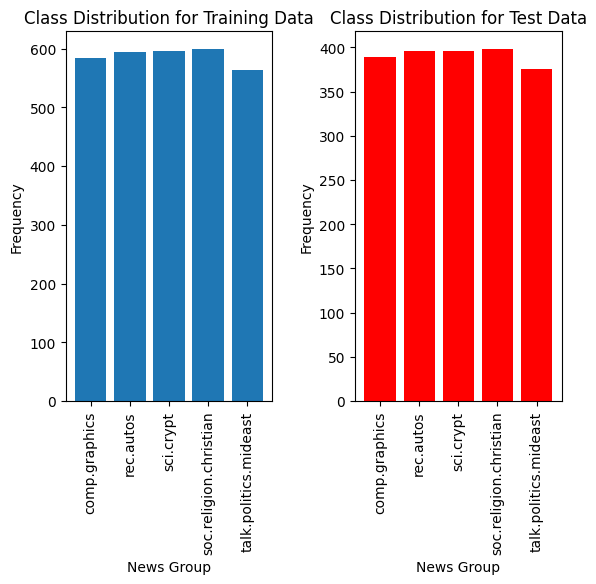

In [15]:
cat = np.array(sub1_test.target_names)
#create bar plots for both training data and test data to compare the distribution

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(cat, frequency_train)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(cat, frequency_test, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

In [16]:
#Convert Bunch format to dataframe
train_df_1 = pd.DataFrame({'data': sub1_train.data, 'target': sub1_train.target})
test_df_1 = pd.DataFrame({'data': sub1_test.data, 'target': sub1_test.target})

In [17]:
#Tokenization
train_df_1 ['data'] = train_df_1['data'] .apply(word_tokenize)
test_df_1['data']= test_df_1 ['data']. apply(word_tokenize)

In [18]:
preprocess_text(train_df_1, 'data')
preprocess_text(test_df_1,'data')

In [19]:
# Remove rows with empty or whitespace strings in the "data" column
train_df_1 = train_df_1[train_df_1['data'].apply(len) > 0]
test_df_1 = test_df_1[test_df_1['data'].apply(len) > 0]

In [20]:
word_count(train_df_1,'data')

Average Word Count :115.4011934011934
Maximum Word Count :4777
Minimum Word Count :1


In [21]:
word_count(test_df_1,'data')

Average Word Count :119.35683987274655
Maximum Word Count :4714
Minimum Word Count :1


In [26]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2849 entries, 0 to 2935
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        2849 non-null   object
 1   target      2849 non-null   int64 
 2   word_count  2849 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 89.0+ KB


In [27]:
test_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1954
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        1886 non-null   object
 1   target      1886 non-null   int64 
 2   word_count  1886 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.9+ KB


In [22]:
train_df_1.head()

,data,target,word_count
0,"[atrocity, report, horrify, azerbaijan, azeri,...",4,77
1,"[account, human, right, violation, azerbaijan,...",4,2524
2,"[anyone, know, good, shareware, animation, pai...",0,21
3,"[trying, avoid, discussion, whether, clinton, ...",4,21
4,"[far, know, isdn, call, swissnet, plugged, bit...",2,23


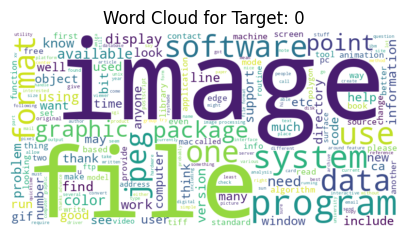

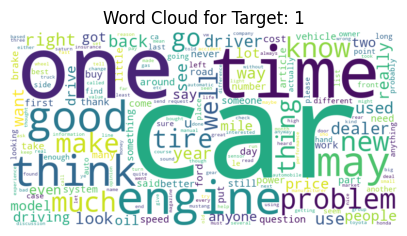

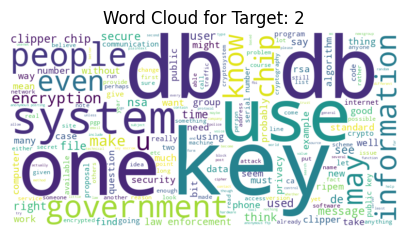

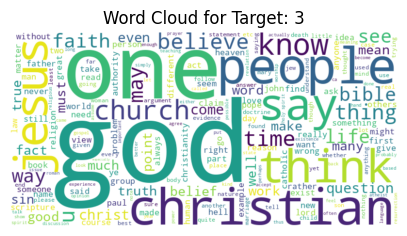

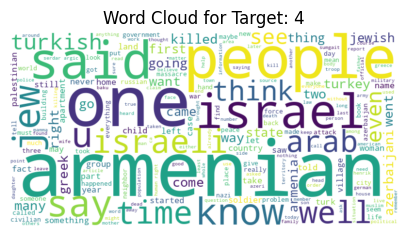

In [23]:
group_train_df_1 = train_df_1.groupby('target')

# Create a word cloud for each target
for target, group in group_train_df_1:
    # Combine the text data from the group into a single string
    combined_text = " ".join(group['data'].apply(lambda x: ' '.join(x)))

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud with the target as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Target: {target}")
    plt.axis("off")
    plt.show()

In [24]:
# TF-IDF

train_df_1['data'] = train_df_1['data'].apply(lambda tokens: ' '.join(tokens))
test_df_1['data'] =test_df_1['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X1_train = tfidf_vectorizer.fit_transform(train_df_1['data'])

X1_test = tfidf_vectorizer.transform(test_df_1['data'])

In [25]:
print(X1_train.shape)

(2849, 5000)


In [46]:
#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X1_train, train_df_1['target'])

MultinomialNB()

In [47]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X1_test)
accuracy = accuracy_score(test_df_1['target'], predictions)

report = classification_report(test_df_1['target'], predictions, target_names=sub1_train.target_names)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8796394485683987
                        precision    recall  f1-score   support

         comp.graphics       0.87      0.87      0.87       384
             rec.autos       0.91      0.91      0.91       370
             sci.crypt       0.88      0.83      0.85       378
soc.religion.christian       0.81      0.97      0.88       384
 talk.politics.mideast       0.95      0.82      0.88       370

              accuracy                           0.88      1886
             macro avg       0.88      0.88      0.88      1886
          weighted avg       0.88      0.88      0.88      1886



**Subset 2 (Similar categories)**


In [28]:
sub2_train = fetch_20newsgroups(subset='train', remove = remove, categories=cats2)
sub2_test = fetch_20newsgroups (subset='test', remove= remove, categories=cats2)

In [29]:
categories = sub2_train.target_names
categories

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']

In [30]:
len(sub2_train.data)

2936

In [31]:
len(sub2_test.data)

1955

In [32]:
#count observation in each category (Train Data)

cat,frequency_train = np.unique(sub2_train.target, return_counts = True)
cat,frequency_train

(array([0, 1, 2, 3, 4]), array([584, 591, 590, 578, 593]))

In [33]:
#count observation in each category (Test Data)

cat,frequency_test = np.unique(sub2_test.target, return_counts = True)
cat,frequency_test

(array([0, 1, 2, 3, 4]), array([389, 394, 392, 385, 395]))

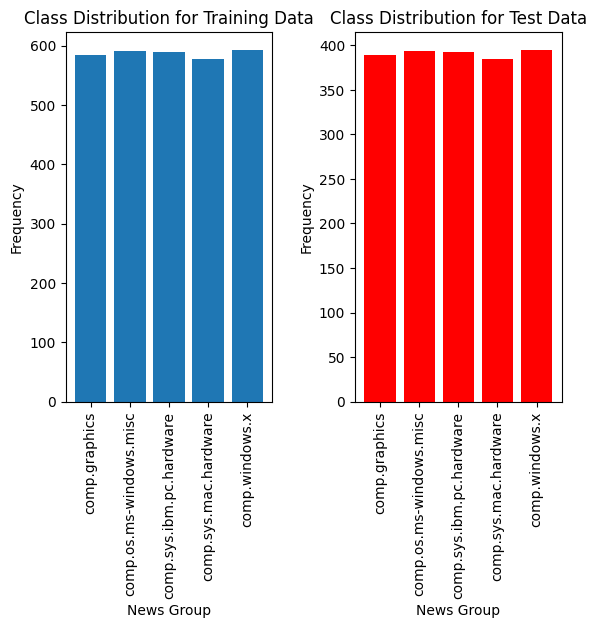

In [34]:
cat = np.array(sub2_test.target_names)
#create bar plots for both training data and test data to compare the distribution

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(cat, frequency_train)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(cat, frequency_test, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

In [35]:
#Convert Bunch format to dataframe
train_df_2 = pd.DataFrame({'data': sub2_train.data, 'target': sub2_train.target})
test_df_2 = pd.DataFrame({'data': sub2_test.data, 'target': sub2_test.target})

In [36]:
#Tokenization
train_df_2 ['data'] = train_df_2['data'] .apply(word_tokenize)
test_df_2['data']= test_df_2 ['data']. apply(word_tokenize)

In [37]:
preprocess_text(train_df_2,'data')
preprocess_text(test_df_2,'data')

In [38]:
# Remove rows with empty or whitespace strings in the "data" column
train_df_2 = train_df_2[train_df_2['data'].apply(len) > 0]
test_df_2 = test_df_2[test_df_2['data'].apply(len) > 0]

In [40]:
train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 0 to 2935
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        2857 non-null   object
 1   target      2857 non-null   int64 
 2   word_count  2857 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 89.3+ KB


In [42]:
test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 1954
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        1909 non-null   object
 1   target      1909 non-null   int64 
 2   word_count  1909 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 59.7+ KB


In [43]:
print("[Train]")
word_count(train_df_2,'data')
print("[Test]")
word_count(test_df_2,'data')

[Train]
Average Word Count :80.59012950647532
Maximum Word Count :4890
Minimum Word Count :1
[Test]
Average Word Count :83.40335254059717
Maximum Word Count :4714
Minimum Word Count :1


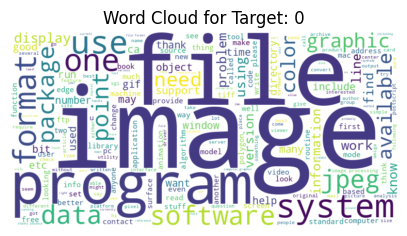

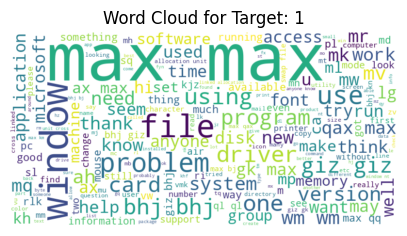

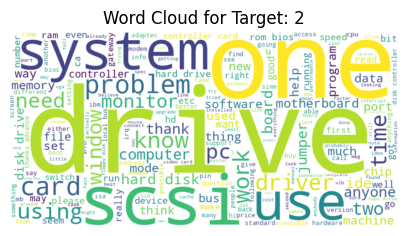

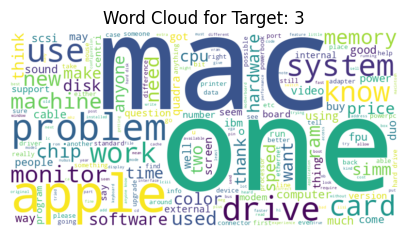

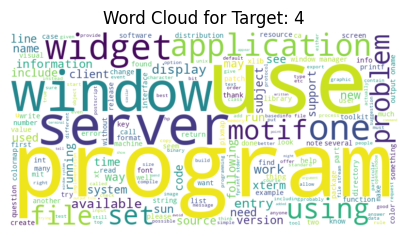

In [44]:
group_train_df_2 = train_df_2.groupby('target')

# Create a word cloud for each target
for target, group in group_train_df_2:
    # Combine the text data from the group into a single string
    combined_text = " ".join(group['data'].apply(lambda x: ' '.join(x)))

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud with the target as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Target: {target}")
    plt.axis("off")
    plt.show()

In [ ]:
# TF-IDF

train_df_2['data'] = train_df_2['data'].apply(lambda tokens: ' '.join(tokens))
test_df_2['data'] =test_df_2['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X2_train = tfidf_vectorizer.fit_transform(train_df_2['data'])

X2_test = tfidf_vectorizer.transform(test_df_2['data'])

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
# Convert the TF-IDF matrix to a DataFrame
tfidf_df_2 = pd.DataFrame(X2_train.toarray(), columns=feature_names)

In [ ]:
tfidf_df_2.head()

,aa,ab,abc,abcdefghijklmnopqrstuvwxyz,ability,able,abort,absolute,absolutely,abstract,...,zri,zrlk,zrmc,zu,zuo,zv,zvm,zy,zyxel,zz
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.07147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Calculate the mean TF-IDF score for each attribute (word)
attribute_means = tfidf_df_2.mean()

# Sort the attributes by their mean TF-IDF scores in descending order
top_10_attributes = attribute_means.sort_values(ascending=False).head(10)

# Print the top 10 most common attributes
print("Top 10 Most Common Attributes:")
print(top_10_attributes)

Top 10 Most Common Attributes:
window     0.027560
file       0.023517
would      0.022336
know       0.021361
thanks     0.020980
problem    0.020750
one        0.020560
drive      0.020077
get        0.019742
use        0.019608
dtype: float64


In [ ]:
# Create a dictionary to store the top 10 attributes by class
top_10_attributes_by_class = {}

# Iterate through each class
for class_label in set(train_df_2['target']):
    # Filter data for the current class
    class_data = train_df_2[train_df_2['target'] == class_label]['data']

    # Calculate the TF-IDF for the current class
    X_class = tfidf_vectorizer.transform(class_data)

    # Calculate the mean TF-IDF score for each attribute (word) in the class
    class_attribute_means = X_class.mean(axis=0)

    # Get the top 10 attributes for the current class
    top_10_attributes = [feature_names[i] for i in class_attribute_means.argsort()[0, ::-1][:10]]

    # Store the top 10 attributes in the dictionary
    top_10_attributes_by_class[class_label] = top_10_attributes

# Print the top 10 attributes for each class
for class_label, top_10_attributes in top_10_attributes_by_class.items():
    top_10_attributes = top_10_attributes[0]  # Extract the array from the DataFrame
    print(f"Top 10 Attributes for Class {class_label}:")
    for attribute in top_10_attributes:
        print(attribute)
    print()  # Add an empty line to separate classes

Top 10 Attributes for Class 0:
['file' 'image' 'graphic' ... 'mbxom' 'maxtor' 'aa']

Top 10 Attributes for Class 1:
['window' 'file' 'driver' ... 'prodrive' 'production' 'keysym']

Top 10 Attributes for Class 2:
['drive' 'card' 'controller' ... 'mj' 'mit' 'aa']

Top 10 Attributes for Class 3:
['mac' 'apple' 'drive' ... 'mri' 'mrd' 'aa']

Top 10 Attributes for Class 4:
['window' 'server' 'widget' ... 'lipman' 'literature' 'aa']



In [ ]:
#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X2_train, train_df_2['target'])

MultinomialNB()

In [ ]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X2_test)
accuracy = accuracy_score(test_df_2['target'], predictions)

report = classification_report(test_df_2['target'], predictions, target_names=sub2_train.target_names)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.7163788592360021
                          precision    recall  f1-score   support

           comp.graphics       0.71      0.76      0.74       384
 comp.os.ms-windows.misc       0.71      0.60      0.65       379
comp.sys.ibm.pc.hardware       0.63      0.76      0.69       386
   comp.sys.mac.hardware       0.74      0.72      0.73       371
          comp.windows.x       0.81      0.74      0.77       391

                accuracy                           0.72      1911
               macro avg       0.72      0.72      0.72      1911
            weighted avg       0.72      0.72      0.72      1911



**Subset 3 (imbalanced)**

In [122]:
remove = ("headers", "footers", "quotes")
news20group_train = fetch_20newsgroups(subset='train', remove = remove)
news20group_test = fetch_20newsgroups (subset='test', remove= remove)


In [123]:
#Convert Bunch format to dataframe
train_df_3 = pd.DataFrame({'data': news20group_train.data, 'target': news20group_train.target})
test_df_3= pd.DataFrame({'data': news20group_test.data, 'target': news20group_test.target})

In [124]:
# Remove rows with the specified target values
train_df_3 = train_df_3[(train_df_3['target'] != 0) & (train_df_3['target'] != 15) & (train_df_3['target'] != 19)]
test_df_3 = test_df_3[(test_df_3['target'] != 0) & (test_df_3['target'] != 15) & (test_df_3['target'] != 19)]

In [125]:
target_mapping = {1: 0,2: 0,3: 0, 4: 0,5: 0, 6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 3, 12: 3, 13: 3, 14: 3, 16: 4, 17: 4, 18: 4}
train_df_3['new_target'] = train_df_3['target'].map(target_mapping)
train_df_3['new_target'] = train_df_3['new_target'].astype(int)
test_df_3['new_target'] = test_df_3['target'].map(target_mapping)
test_df_3['new_target'] = test_df_3['new_target'].astype(int)

In [138]:
categories_3=['computer', 'market', 'sports','sceince', 'politics']

In [126]:
train_df_3.head()

,data,target,new_target
0,I was wondering if anyone out there could enli...,7,2
1,A fair number of brave souls who upgraded thei...,4,0
2,"well folks, my mac plus finally gave up the gh...",4,0
3,\nDo you have Weitek's address/phone number? ...,1,0
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,3


In [127]:
train_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        9858 non-null   object
 1   target      9858 non-null   int64 
 2   new_target  9858 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 308.1+ KB


In [128]:
test_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6564 entries, 0 to 7530
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        6564 non-null   object
 1   target      6564 non-null   int64 
 2   new_target  6564 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 205.1+ KB


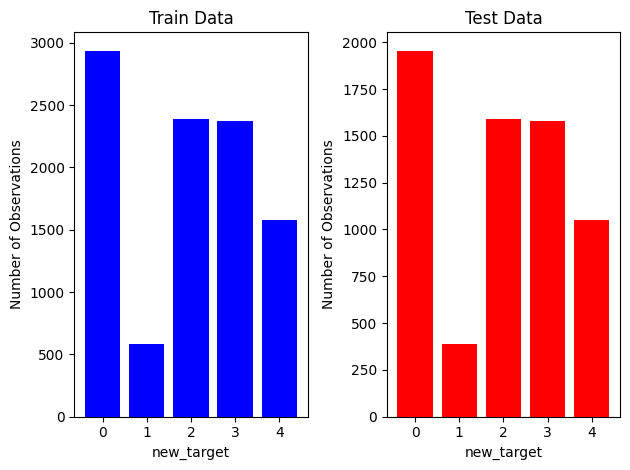

In [129]:

# Group and count the observations by 'new_target' for the train and test DataFrames
train_target_counts = train_df_3['new_target'].value_counts().sort_index()
test_target_counts = test_df_3['new_target'].value_counts().sort_index()

# Create subplots for train and test
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the bar chart for the train data
ax1.bar(train_target_counts.index, train_target_counts.values, color='blue')
ax1.set_title('Train Data')
ax1.set_xlabel('new_target')
ax1.set_ylabel('Number of Observations')
ax1.set_xticks(train_target_counts.index)
ax1.set_xticklabels(train_target_counts.index)

# Plot the bar chart for the test data
ax2.bar(test_target_counts.index, test_target_counts.values, color='red')
ax2.set_title('Test Data')
ax2.set_xlabel('new_target')
ax2.set_ylabel('Number of Observations')
ax2.set_xticks(test_target_counts.index)
ax2.set_xticklabels(test_target_counts.index)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [130]:
#Tokenization
train_df_3 ['data'] = train_df_3['data'] .apply(word_tokenize)
test_df_3['data']= test_df_3 ['data']. apply(word_tokenize)

In [131]:
preprocess_text(train_df_3, 'data')
preprocess_text(test_df_3,'data')

In [132]:
train_df_3.head()

,data,target,new_target
0,"[wondering, anyone, could, enlighten, car, saw...",7,2
1,"[fair, number, brave, soul, upgraded, si, cloc...",4,0
2,"[well, folk, mac, plus, finally, gave, ghost, ...",4,0
3,"[weitek, number, like, get, information, chip]",1,0
4,"[article, tombaker, tom, baker, understanding,...",14,3


In [133]:
# Remove rows with empty or whitespace strings in the "data" column
train_df_3 = train_df_3[train_df_3['data'].apply(len) > 0]
test_df_3 = test_df_3[test_df_3['data'].apply(len) > 0]

In [140]:
train_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9575 entries, 0 to 11313
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        9575 non-null   object
 1   target      9575 non-null   int64 
 2   new_target  9575 non-null   int64 
 3   word_count  9575 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 374.0+ KB


In [141]:
test_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 7530
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        6358 non-null   object
 1   target      6358 non-null   int64 
 2   new_target  6358 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 198.7+ KB


In [134]:
word_count(train_df_3,'data')

word_count(test_df_1,'data')

Average Word Count :91.53953002610966
Maximum Word Count :6216
Minimum Word Count :1
Average Word Count :850.6542948038176
Maximum Word Count :32898
Minimum Word Count :3


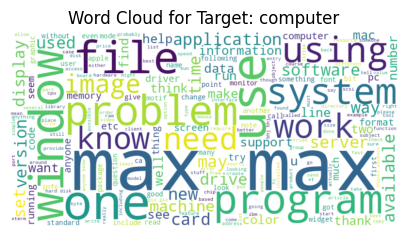

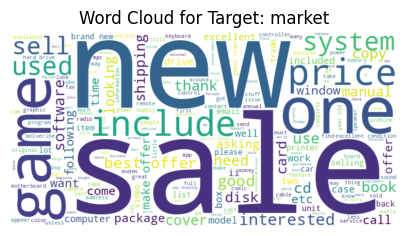

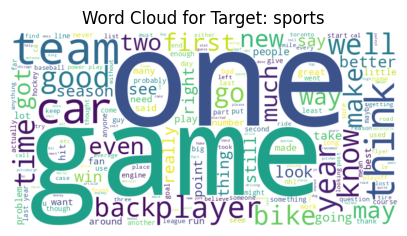

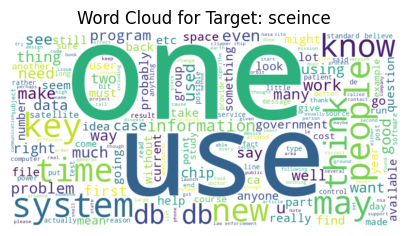

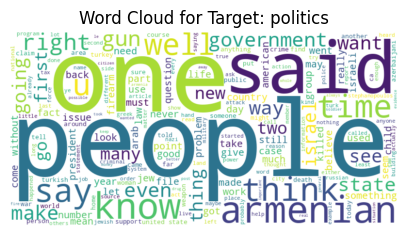

In [139]:

group_train_df_3 = train_df_3.groupby('new_target')

# Create a word cloud for each target
for target, group in group_train_df_3:
    # Combine the text data from the group into a single string
    combined_text = " ".join(group['data'].apply(lambda x: ' '.join(x)))

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    target=categories_3[target]

    # Display the word cloud with the target as the title
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Target: {target}")
    plt.axis("off")
    plt.show()

In [142]:

# TF-IDF

train_df_3['data'] = train_df_3['data'].apply(lambda tokens: ' '.join(tokens))
test_df_3['data'] =test_df_3['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X3_train = tfidf_vectorizer.fit_transform(train_df_3['data'])

X3_test = tfidf_vectorizer.transform(test_df_3['data'])

In [143]:

#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X3_train, train_df_3['new_target'])

MultinomialNB()

In [145]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X3_test)
accuracy = accuracy_score(test_df_3['new_target'], predictions)

report = classification_report(test_df_3['new_target'], predictions, target_names=categories_3)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8131487889273357
              precision    recall  f1-score   support

    computer       0.76      0.93      0.84      1909
      market       0.95      0.29      0.45       382
      sports       0.84      0.87      0.86      1524
     sceince       0.81      0.72      0.76      1519
    politics       0.88      0.83      0.85      1024

    accuracy                           0.81      6358
   macro avg       0.85      0.73      0.75      6358
weighted avg       0.82      0.81      0.80      6358

